<a href="https://colab.research.google.com/github/rishikaul22/Data-Science-Lab/blob/main/DS_tutorial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science, Tutorial 3

Name: Rishi Kaul

UID: 2018130019

Batch: A

Classification after Reduction

Consider an equal mixture of three 3-dimensional Gaussian distributions with identical covariance matrices. After spher-ing the data, the covariance matrices are all equal to the identity matrix. Suppose the mean vectors of the sphered data are μ 1 = [2, 1, −3] T , μ 2 = [1, −4, 0] T , and μ 3= [2, 4, 6] T

In [3]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pandas_datareader import *
from numpy.linalg import svd , pinv

In [4]:
n = 1000

In [5]:
mu1 = np.array([2 ,1 , -3])
mu2 = np.array([1 , -4 ,0])
mu3 = np.array([2 ,4 ,0])

In [6]:
X1 = randn(n ,3) + mu1
X2 = randn(n ,3) + mu2
X3 = randn(n ,3) + mu3

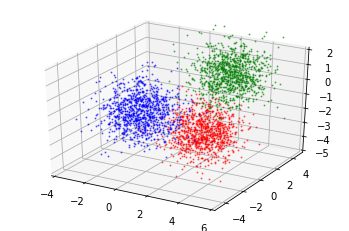

In [7]:
fig = plt.figure()
ax = fig.gca(projection ='3d',)
ax.plot(X1[: ,0] , X1[: ,1] , X1[: ,2] , 'r.', alpha = 0.5, markersize =2)
ax.plot(X2[: ,0] , X2[: ,1] , X2[: ,2] , 'b.', alpha = 0.5 , markersize =2)
ax.plot(X3[: ,0] , X3[: ,1] , X3[: ,2] , 'g.',alpha = 0.5, markersize =2)
ax.set_xlim3d(-4, 6)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 2)
plt.show()

Since we have equal mixtures, we classify each data point x according to the closest distance to μ 1 , μ 2 , or μ 3 . We can achieve a reduction in the dimensionality of the data by projecting the data onto the two-dimensional affine space spanned by the {μ i }; that is, all

        μ 1 + β 1 (μ 2 − μ 1 ) + β 2 (μ 3 − μ 1 ),          β 1 , β 2 ∈ R.

In fact, one may just as well project the data onto the subspace spanned by the vectors μ 21 = μ 2 − μ 1 and μ 31 = μ 3 − μ 1 . Let W = [μ 21 , μ 31 ] be the 3 × 2 matrix whose columns are μ 21 and μ31. The orthogonal projection matrix onto the subspace W spanned by thecolumns of W is (see Theorem A.4):

            P = WW+ = W(WT W)-1 WT .

Let UDVT > be the singular value decomposition of W. Then P can also be written as

            P = UD(DT D)-1 DT UT .

Note that D has dimension 3 × 2, so is not square. The first two columns of U, say u1 and u2 , form an orthonormal basis of the subspace W. What we want to do is rotate this subspace to the x − y plane, mapping u1 and u2 to [1, 0, 0]T and [0, 1, 0]T, respectively. This is achieved via the rotation matrix U-1 = UT, giving the skewed projection matrix

            R = UT P = D(DT D)-1 DT UT,

whose 3rd row only contains zeros. Applying R to all the data points, and ignoring the 3rd component of the projected points (which is 0),We see that the projected points are much better separated than the original ones. We have achieved dimensionality reduction of the data while retaining all the necessary information required for classification.

In [8]:
mu21 = (mu2 - mu1).reshape (3 ,1)
mu31 = (mu3 - mu1).reshape (3 ,1)

In [9]:
W = np.hstack(( mu21 , mu31))

In [10]:
U,_,_ = svd(W)

In [11]:
P = W @ pinv(W)

In [12]:
R = U.T @ P

In [13]:
RX1 = (R @ X1.T).T
RX2 = (R @ X2.T).T
RX3 = (R @ X3.T).T

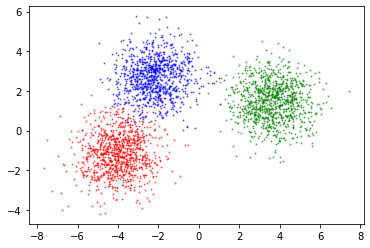

In [14]:
plt.plot(RX1 [: ,0] , RX1 [: ,1] ,'b.',alpha =0.5 , markersize =2)
plt.plot(RX2 [: ,0] , RX2 [: ,1] ,'g.',alpha =0.5 , markersize =2)
plt.plot(RX3 [: ,0] , RX3 [: ,1] ,'r.',alpha =0.5 , markersize =2)
plt.show ()

# Conclusion
The original data is in 3-D and seems quite separable.
The dimensionality reduction is performed on this data using SVD and it is converted into 2-D.
The newly projected two dimensional data points are better separated than the original three dimensional data points.
The dimensionality reduction is achieved and all the necessar information in the data is also retained here.
The reatined information and enhanced separability would improve the classification performance.